# MFCC from scratch

In [1]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

## Getting an audio file

In [8]:
audio, sr = librosa.load('/home/joao/Desktop/datasets/data_speech_commands_v0.02/cat/' + 'ffd2ba2f_nohash_0.wav')

## Extracting Short-Time Fourier Transform

In [5]:
FRAME_SIZE = 2048
HOP_SIZE = 512
S_scale = librosa.stft(audio, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

## Calculating the spectrogram

In [6]:
Y_scale = np.abs(S_scale) ** 2

## Visualizing the spectrogram 

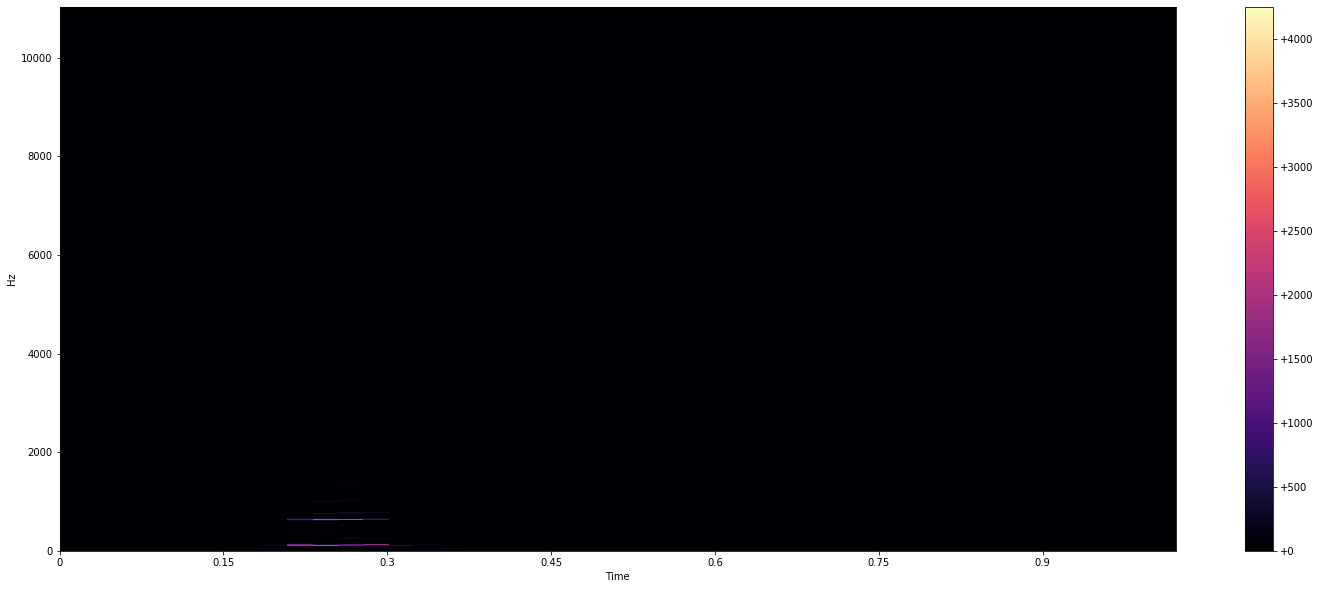

In [9]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

plot_spectrogram(Y_scale, sr, HOP_SIZE)

## Calculating the Mel filter banks

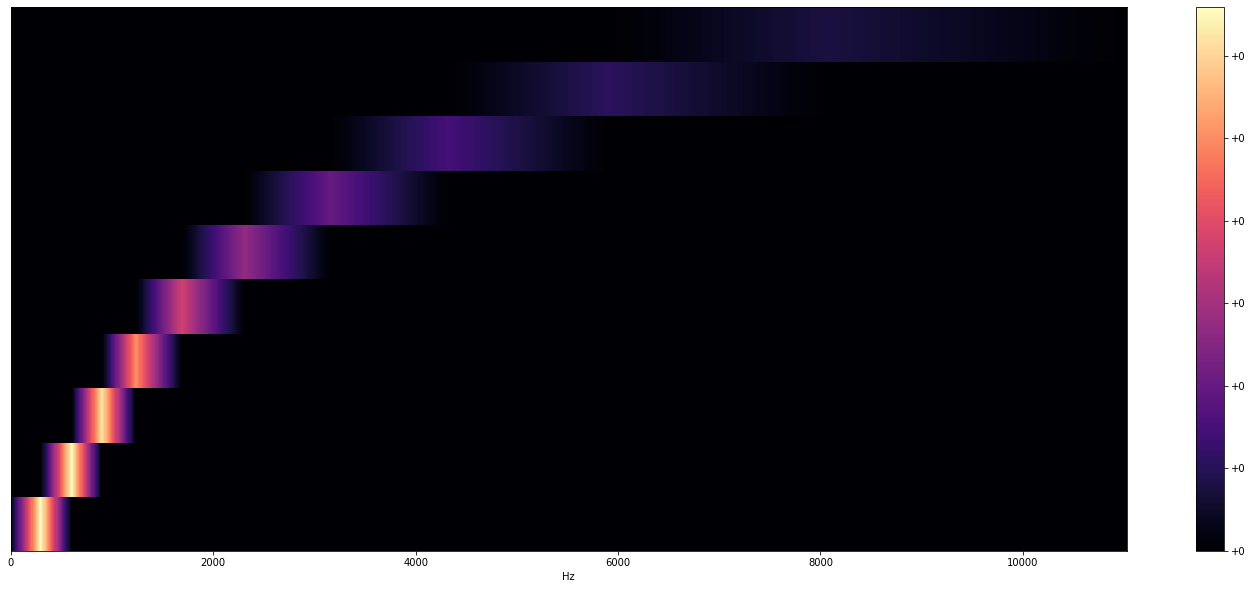

In [10]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks, 
                         sr=sr, 
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

## Computing log-power Mel spectrogram

In [22]:
S = np.dot(filter_banks, Y_scale) #Work-In-Progress

## Calculating MFCC

In [25]:
mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S))
# mfccs = librosa.feature.mfcc(y=audio, sr=sr)

## Visualizing MFCC

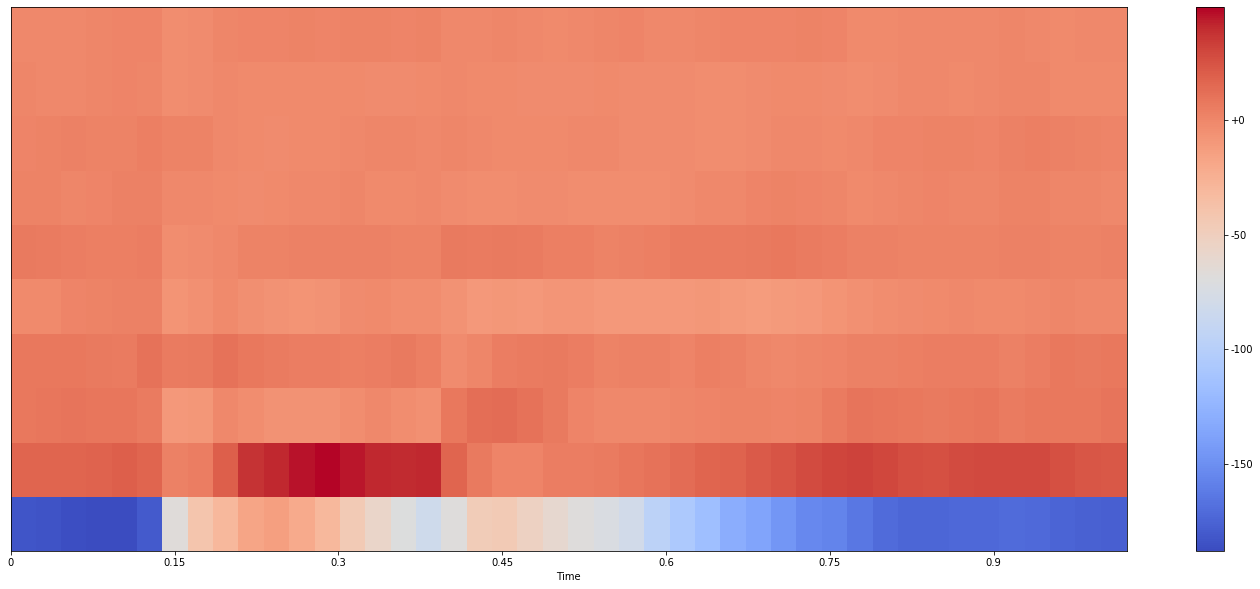

In [26]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()